# anomaly detection of wine with matplotlib

In [1]:
# Cell 1: Import necessary libraries and load the dataset
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score

# Load the wine dataset
wine = loadmat('wine.mat')

# Grab the features and create a DataFrame
columns = ["alcohol", "malicacid", "ash", "alcalinity_of_ash", "magnesium",
          "total_phenols", "flavanoids", "nonflanoid_phenols", "proanthocyanins",
          "color_intensity", "hue", "0D280_0D315_of_diluted_wines", "proline"]
df = pd.DataFrame(wine["X"], columns=columns)

# Anomaly targets
y_true = wine["y"].flatten()

# Fit the model with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

# Get predicted data
component = gmm.predict(df)
proba = gmm.predict_proba(df)


Explained variance ratio: [0.99624189 0.00338762]


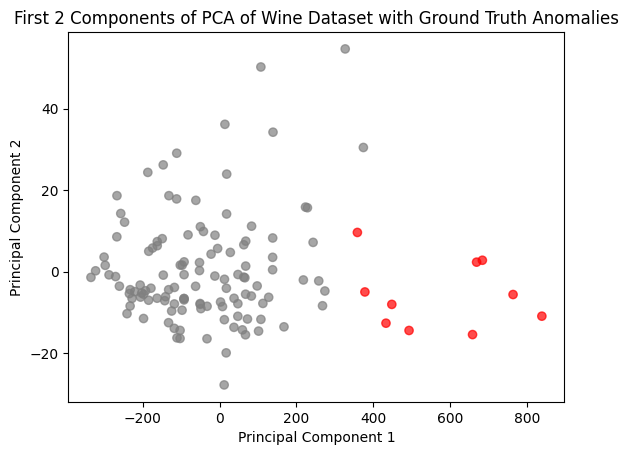

In [3]:
import matplotlib.pyplot as plt

# Cell 2: Create PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Show as scatterplot using Matplotlib
plt.scatter(x=pca_components[:, 0], y=pca_components[:, 1],
            c=np.where(y_true==1, 'r', 'gray'), alpha=0.7)
plt.title('First 2 Components of PCA of Wine Dataset with Ground Truth Anomalies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Confusion Matrix:
[[116   3]
 [  0  10]]
F1 Score: 0.8695652173913044


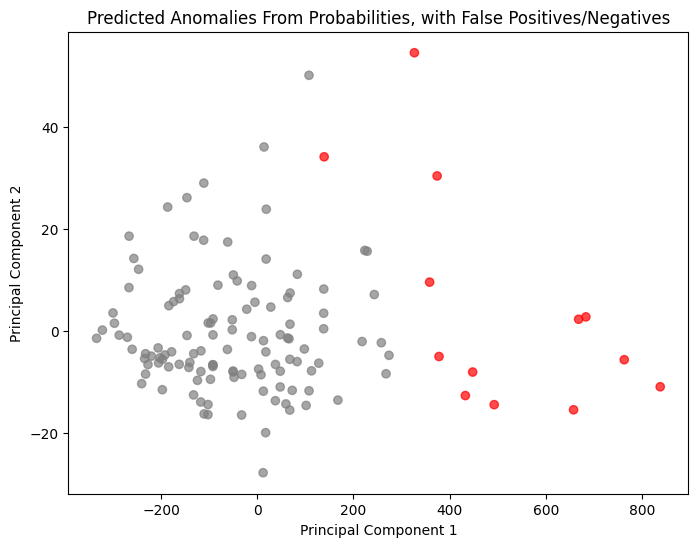

In [4]:
# Cell 3: Adjust components based on probability analysis
component_fixed = np.where(proba[:, 1] > 0.99999, 1, 0)

# Put together confusion matrix
cm = confusion_matrix(y_true, component_fixed)
print('Confusion Matrix:')
print(cm)
print('F1 Score:', f1_score(y_true, component_fixed))

# Plot the predicted anomalies using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(x=pca_components[:, 0], y=pca_components[:, 1],
            c=np.where(component_fixed==1, 'r', 'gray'), alpha=0.7)
plt.title('Predicted Anomalies From Probabilities, with False Positives/Negatives')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


with seaborn library you can have these plot also:

# solving with Seaborn

In [5]:
# Cell 1: Import necessary libraries and load the dataset
from scipy.io import loadmat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score
from tabulate import tabulate

# Load the wine dataset
wine = loadmat('wine.mat')

# Grab the features and create a DataFrame
columns = ["alcohol", "malicacid", "ash", "alcalinity_of_ash", "magnesium",
           "total_phenols", "flavanoids", "nonflanoid_phenols", "proanthocyanins",
           "color_intensity", "hue", "0D280_0D315_of_diluted_wines", "proline"]
df = pd.DataFrame(wine["X"], columns=columns)

# Anomaly targets
y_true = wine["y"].flatten()

# Fit the GMM model with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

# Get predicted data
component = gmm.predict(df)
proba = gmm.predict_proba(df)


Explained variance ratio: [0.99624189 0.00338762]


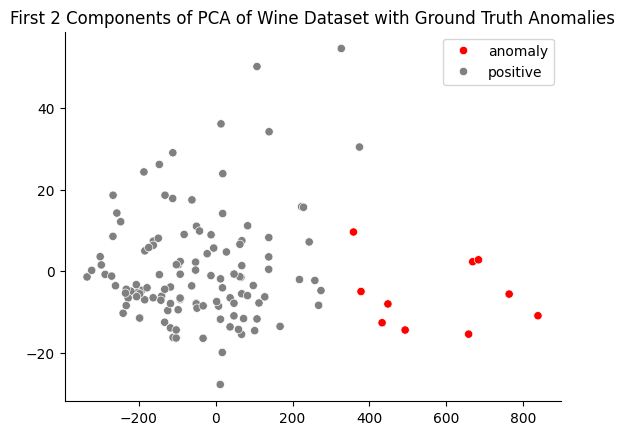

In [6]:
# Cell 2: Create PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Show as scatterplot
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=np.where(y_true==1, 'anomaly', 'positive'),
                palette=sns.color_palette(['r', 'gray'], as_cmap=True))
sns.despine()
plt.title('First 2 Components of PCA of Wine Dataset with Ground Truth Anomalies')
plt.show()


╒═══════════════╤══════════════════════╤═════════════════════╕
│               │   Predicted Positive │   Predicted Anomaly │
╞═══════════════╪══════════════════════╪═════════════════════╡
│ True Positive │                  108 │                  11 │
├───────────────┼──────────────────────┼─────────────────────┤
│ True Anomaly  │                    0 │                  10 │
╘═══════════════╧══════════════════════╧═════════════════════╛
F1 Score: 0.6451612903225806


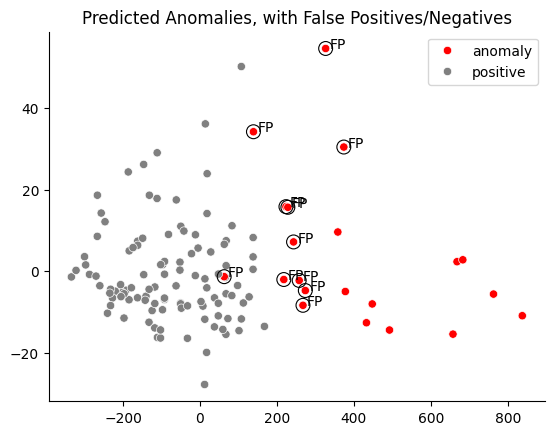

In [7]:
# Cell 3: Align ground truth with predicted values and compute confusion matrix
if sum(component) >= len(component)/2:
    component = -1*(component-1)
    proba = proba[:,[1,0]]

# Put together confusion matrix
cm = pd.DataFrame(confusion_matrix(y_true, component),
                  columns=['Predicted Positive', 'Predicted Anomaly'],
                  index=['True Positive', 'True Anomaly'])

# Print confusion matrix
print(tabulate(cm, headers='keys', tablefmt='fancy_grid'))
print('F1 Score:', f1_score(y_true, component))

# Visualize predicted anomalies
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=np.where(component==1, 'anomaly', 'positive'),
                palette=sns.color_palette(['red', 'gray'], as_cmap=True))

# Plot and annotate false positives
pca_components_FP = pca_components[(y_true==0)&(component==1), :]
sns.scatterplot(x=pca_components_FP[:, 0], y=pca_components_FP[:, 1], color='black', fc='none', ec='black', s=100)

for i in range(len(pca_components_FP)):
    plt.annotate("FP", (pca_components_FP[-(i+1), 0]+10, pca_components_FP[-(i+1), 1]))

# Plot and annotate false negatives
pca_components_FN = pca_components[(y_true==1)&(component==0), :]
sns.scatterplot(x=pca_components_FN[:, 0], y=pca_components_FN[:, 1], color='black')

for i in range(len(pca_components_FN)):
    plt.annotate("FP", (pca_components_FN[-(i+1), 0]+10, pca_components_FN[-(i+1), 1]))

sns.despine()
plt.title('Predicted Anomalies, with False Positives/Negatives')
plt.show()


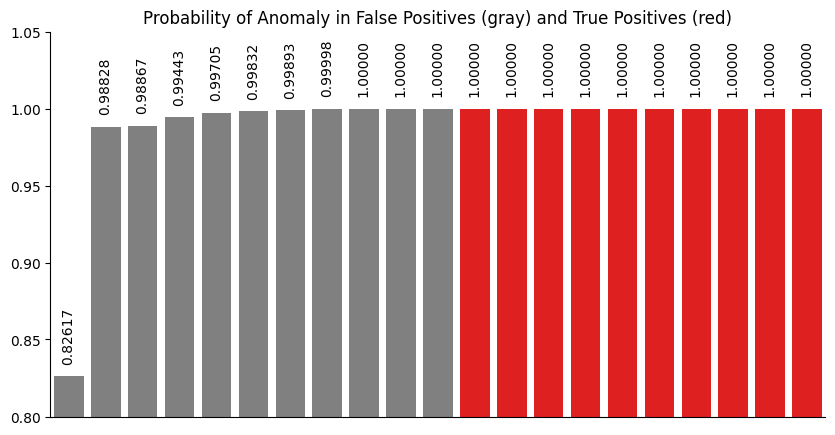

In [8]:
# Cell 4: Visualize the probability of anomalies in false positives and true positives
plt.figure(figsize=(10, 5))

proba_FP = proba[(y_true==0)&(component==1), 1]
proba_FP.sort()
proba_TP = proba[(y_true==1)&(component==1), 1]
proba_TP.sort()
proba_analysis = np.concatenate([proba_FP, proba_TP])
type = ['fp'] * len(proba_FP) + ['tp'] * len(proba_TP)
x = list(range(len(proba_analysis)))

ax = sns.barplot(x=x, y=proba_analysis, dodge=False,
                 hue=type, palette=sns.color_palette(['gray', 'red'], as_cmap=True))

for i, val in enumerate(list(proba_analysis)):
    plt.annotate('%.5f' % val, (i-0.2, val+0.01), rotation=90)

ax.set_ybound(0.8, 1.05)
plt.xticks([])
sns.despine()
plt.title('Probability of Anomaly in False Positives (gray) and True Positives (red)')
plt.legend().remove()
plt.show()


╒═══════════════╤══════════════════════╤═════════════════════╕
│               │   Predicted Positive │   Predicted Anomaly │
╞═══════════════╪══════════════════════╪═════════════════════╡
│ True Positive │                  116 │                   3 │
├───────────────┼──────────────────────┼─────────────────────┤
│ True Anomaly  │                    0 │                  10 │
╘═══════════════╧══════════════════════╧═════════════════════╛
F1 Score: 0.8695652173913044


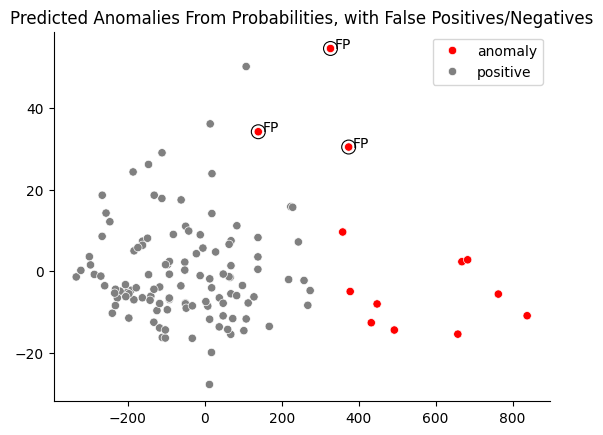

In [9]:
# Cell 5: Create new components based on the probability analysis and visualize the results
component_fixed = np.where(proba[:, 1]>0.99999, 1, 0)

# Put together confusion matrix
cm = pd.DataFrame(confusion_matrix(y_true, component_fixed),
                  columns=['Predicted Positive', 'Predicted Anomaly'],
                  index=['True Positive', 'True Anomaly'])

# Print confusion matrix
print(tabulate(cm, headers='keys', tablefmt='fancy_grid'))
print('F1 Score:', f1_score(y_true, component_fixed))

# Visualize predicted anomalies
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=np.where(component_fixed==1, 'anomaly', 'positive'),
                palette=sns.color_palette(['red', 'gray'], as_cmap=True))

# Plot and annotate false positives
pca_components_FP = pca_components[(y_true==0)&(component_fixed==1), :]
sns.scatterplot(x=pca_components_FP[:, 0], y=pca_components_FP[:, 1], color='black', fc='none', ec='black', s=100)

for i in range(len(pca_components_FP)):
    plt.annotate("FP", (pca_components_FP[-(i+1), 0]+10, pca_components_FP[-(i+1), 1]))

# Plot and annotate false negatives
pca_components_FN = pca_components[(y_true==1)&(component_fixed==0), :]
sns.scatterplot(x=pca_components_FN[:, 0], y=pca_components_FN[:, 1], color='black')

for i in range(len(pca_components_FN)):
    plt.annotate("FP", (pca_components_FN[-(i+1), 0]+10, pca_components_FN[-(i+1), 1]))

sns.despine()
plt.title('Predicted Anomalies From Probabilities, with False Positives/Negatives')
plt.show()
